In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
freqs = [200, 600, 1100, 2000]
period = 200
f_max = "max_state_{}ms_single_core.npy".format(period)
f_min = "min_state_{}ms_single_core.npy".format(period)
f_dist = "bucket_counts_{}ms_single_core.npy".format(period)
maxs = {}
mins = {}
dist = {}
raw_data = {}
ds = []

#val_labels = ["MBPKI", "IPC", "MPKI", "MDAPKI", "Celsius", "Watts", "KHz"]
val_labels = ["MBPKI", "IPC_u", "MPKI", "Celsius", "Watts", "KHz", "IPC_p"]
for freq in freqs:
    directory = "bt_{}ms_{}MHz".format(period, freq)
    ds.append(directory)
    maxs[directory] = np.load(directory + "/" + f_max)
    mins[directory] = np.load(directory + "/" + f_min)
    dist[directory] = np.load(directory + "/" + f_dist)
    raw_data[directory] = np.load(directory + "/" + "raw.npy")[:4000]

In [47]:
for d in ds:
    print(d)
    print("\t\tmax\t\tmin")
    for i in range(len(val_labels[:-1])):
        print("{}\t\t{:.2f}\t\t{}".format(val_labels[i], maxs[d][i], mins[d][i]))
    print()

bt_200ms_200MHz
		max		min
MBPKI		25.04		0.2854113976480777
IPC_u		1.71		0.01719189070390699
MPKI		7.25		0.06539773195588931
Celsius		59.00		52.0
Watts		0.30		0.111386
KHz		200000.00		200000.0

bt_200ms_600MHz
		max		min
MBPKI		24.16		0.22720856157638453
IPC_u		1.57		0.015619274143884686
MPKI		7.51		0.02464255257992236
Celsius		54.00		50.0
Watts		0.59		0.16416
KHz		600000.00		600000.0

bt_200ms_1100MHz
		max		min
MBPKI		638.78		0.6526618127139513
IPC_u		6.88		0.010117878881491299
MPKI		78.94		0.08090957297172148
Celsius		54.00		49.0
Watts		0.94		0.271002
KHz		1100000.00		1100000.0

bt_200ms_2000MHz
		max		min
MBPKI		24.29		0.4614288850682411
IPC_u		4.65		0.012711875228223042
MPKI		41.93		0.012043137558941484
Celsius		97.00		54.0
Watts		3.87		1.055086
KHz		2000000.00		900000.0



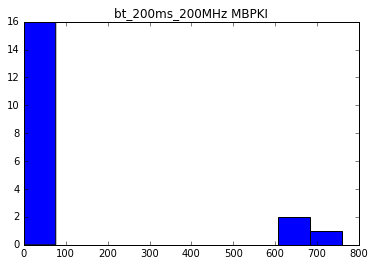

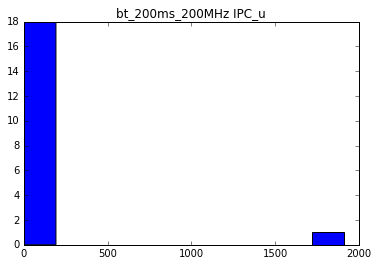

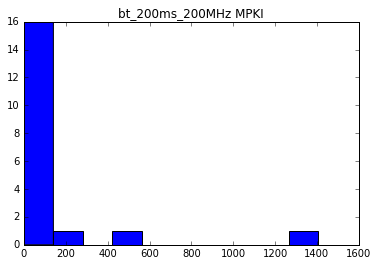

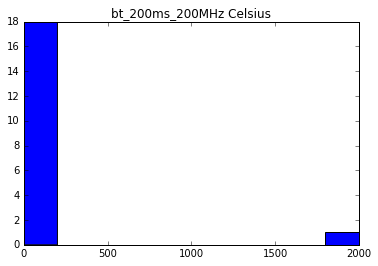

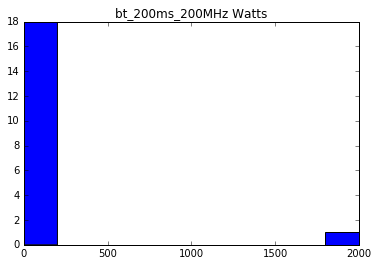

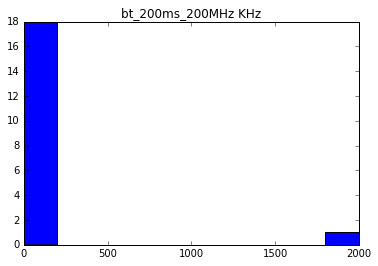

In [48]:
d = ds[0]
for i in range(len(dist[d])):
    plt.hist(dist[d][i], bins=10) #len(dist[d][i]))
    plt.title(d + " " + val_labels[i])
    plt.show()

In [50]:
for d in ds:
    data = pd.DataFrame(raw_data[d])
    data.columns=val_labels
    print("Raw data summary for",d)
#     print(data.head())
    print(data.describe())
    print("\n\n")

Raw data summary for bt_200ms_200MHz
             MBPKI        IPC_u         MPKI      Celsius        Watts  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      7.910194     0.807030     1.180620    53.988000     0.182822   
std       9.314142     0.348930     1.523274     1.734174     0.042302   
min       0.285411     0.017192     0.065398    52.000000     0.111386   
25%       1.679697     0.337027     0.097210    53.000000     0.170731   
50%       1.762941     0.989188     0.229437    54.000000     0.177840   
75%      21.098736     1.014711     2.209200    55.000000     0.211584   
max      25.041735     1.707390     7.245919    59.000000     0.304608   

            KHz        IPC_p  
count    2000.0  2000.000000  
mean   200000.0     0.000740  
std         0.0     0.000482  
min    200000.0     0.000011  
25%    200000.0     0.000095  
50%    200000.0     0.001014  
75%    200000.0     0.001040  
max    200000.0     0.001750  



Raw data summa

## Place collected stats on a log scale, then bin them:

Raw data summary for bt_200ms_200MHz


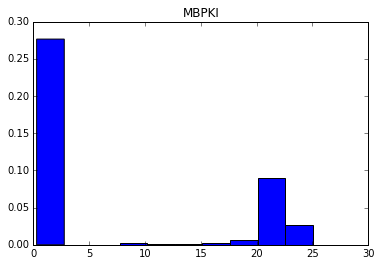

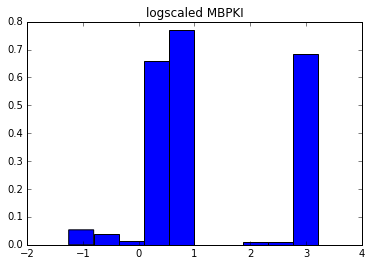

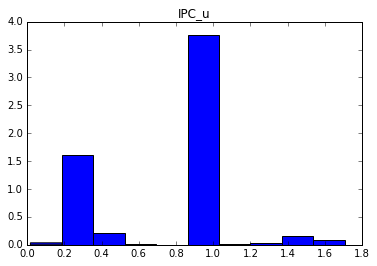

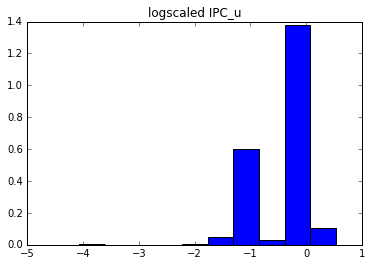

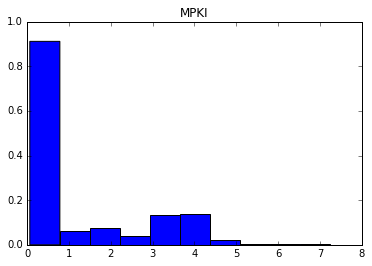

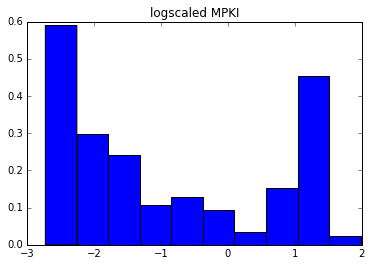

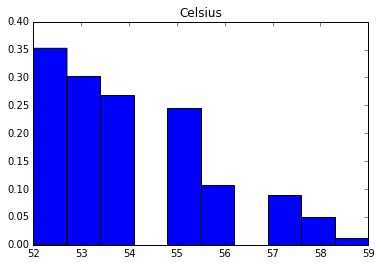

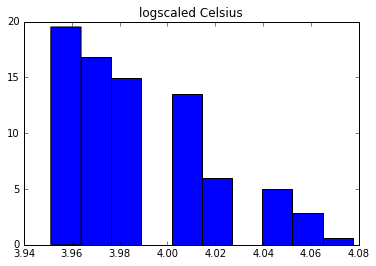

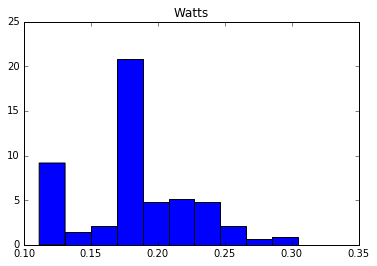

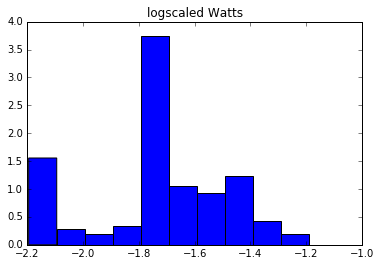

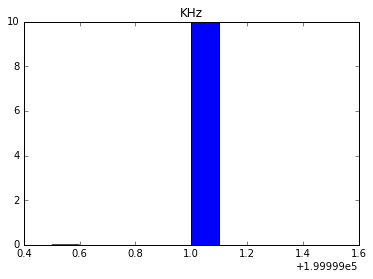

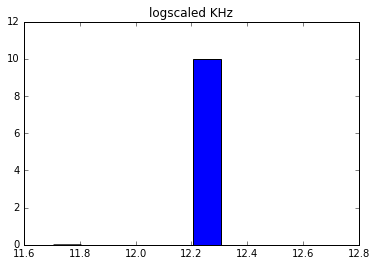

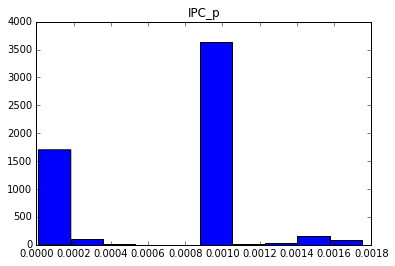

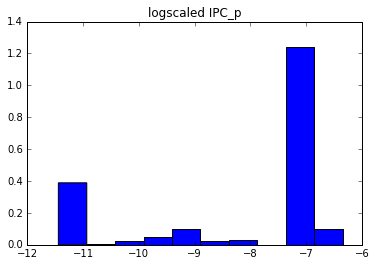

Raw data summary for bt_200ms_600MHz


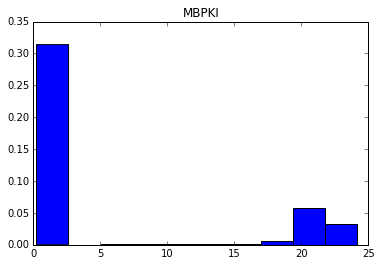

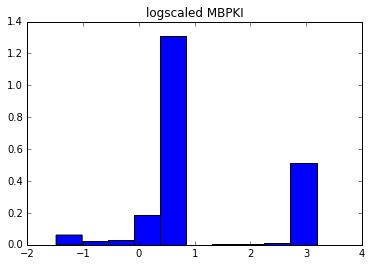

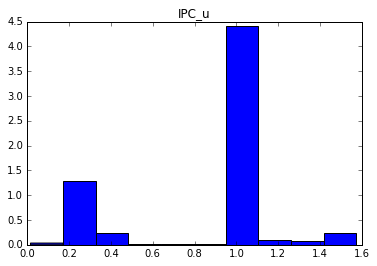

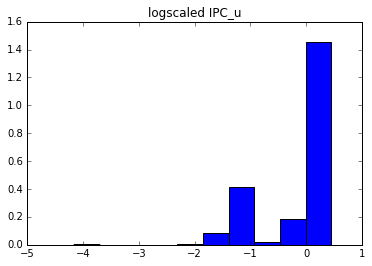

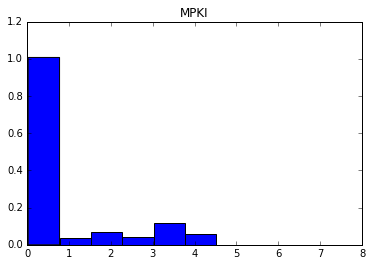

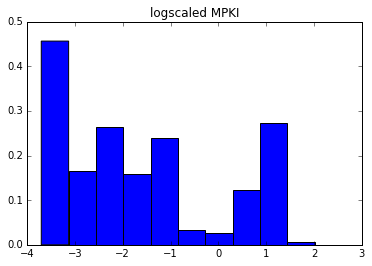

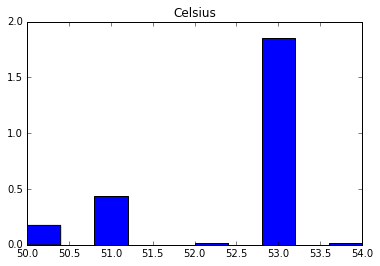

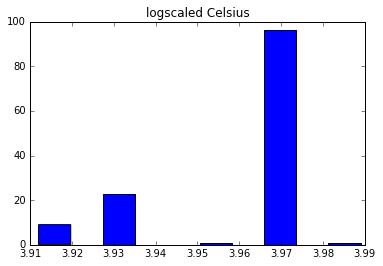

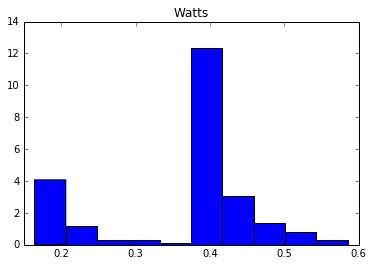

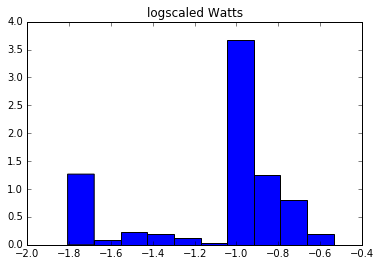

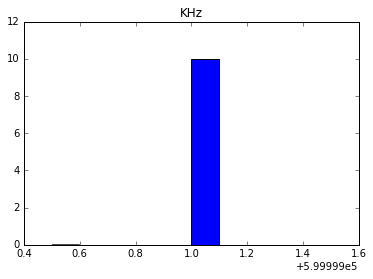

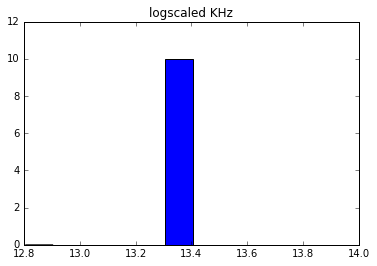

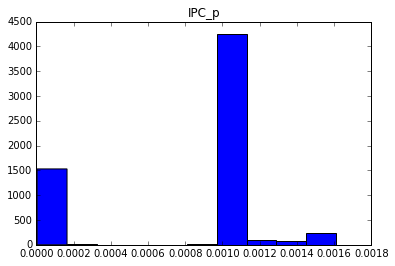

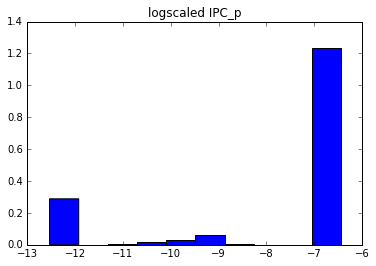

Raw data summary for bt_200ms_1100MHz


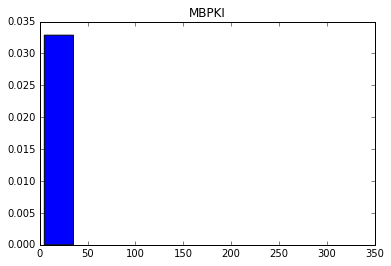

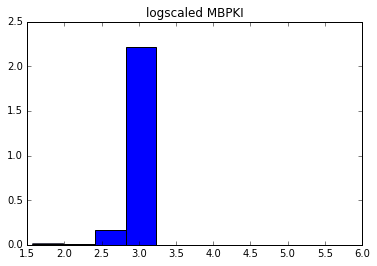

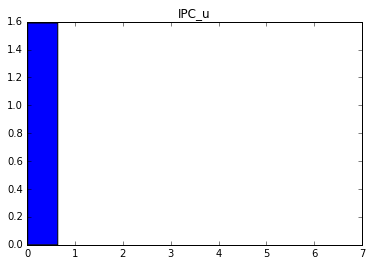

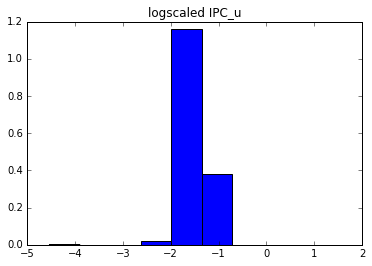

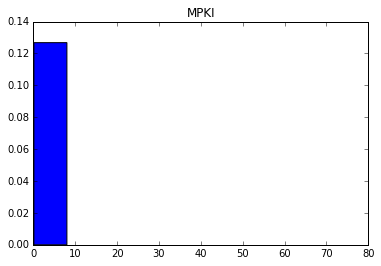

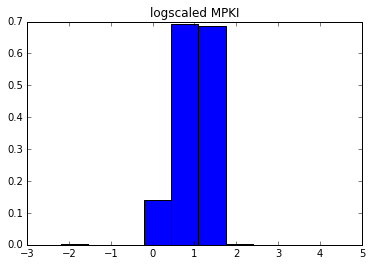

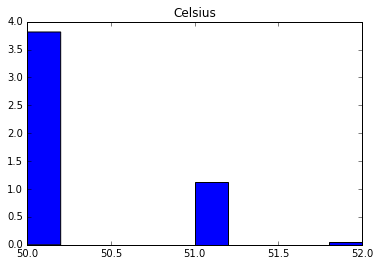

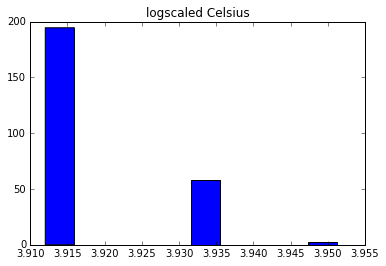

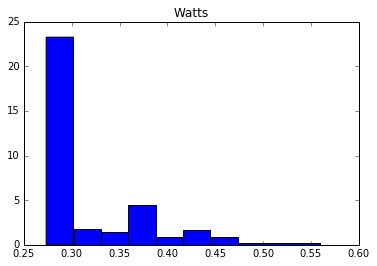

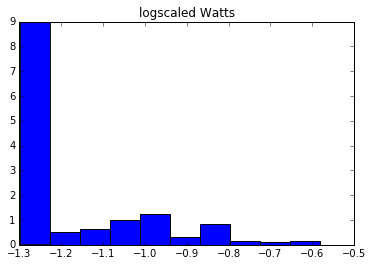

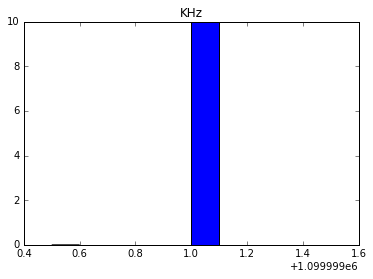

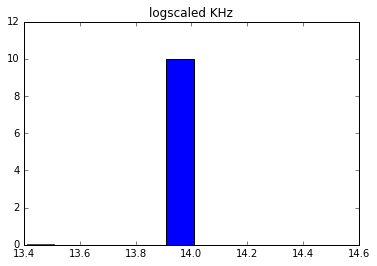

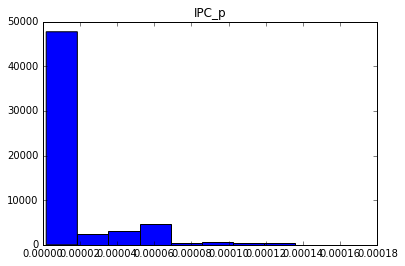

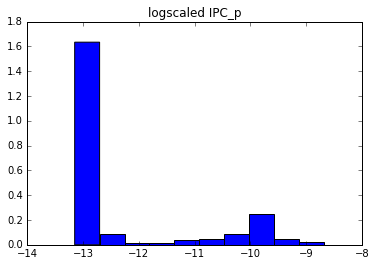

Raw data summary for bt_200ms_2000MHz


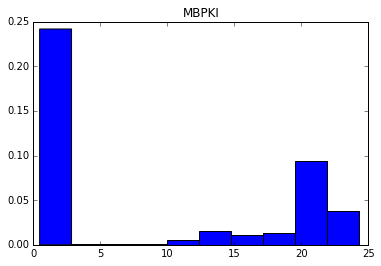

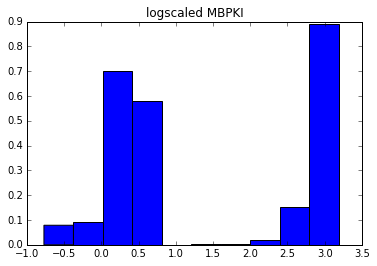

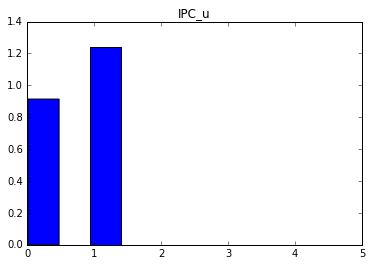

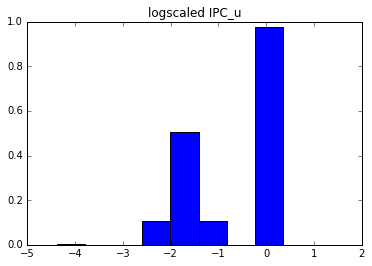

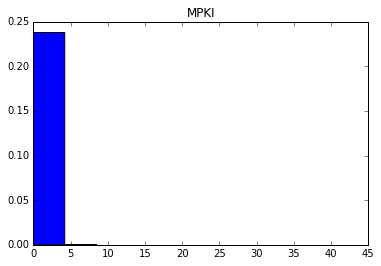

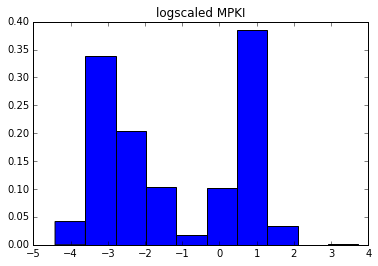

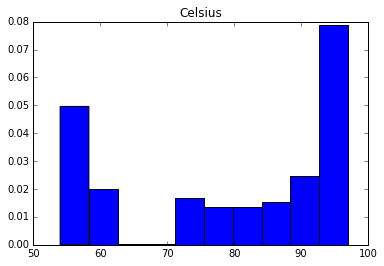

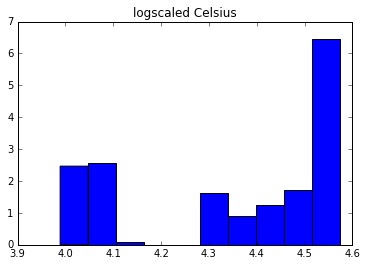

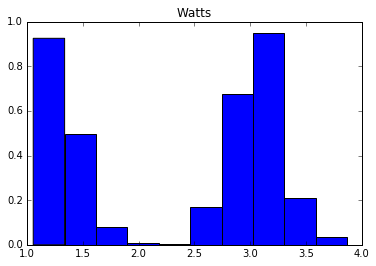

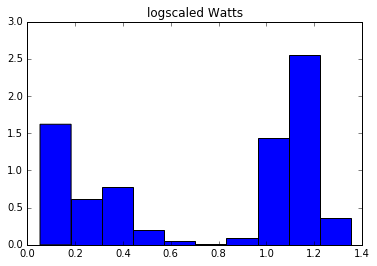

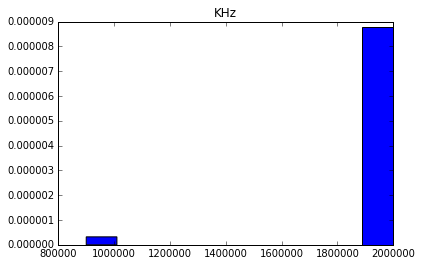

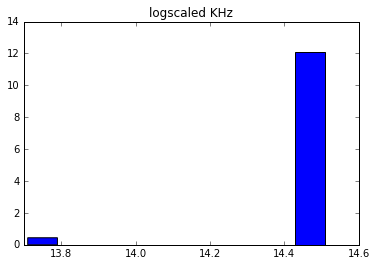

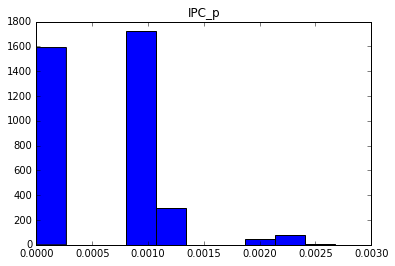

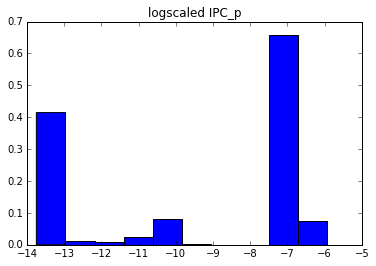

In [51]:
nbins=10
for d in ds:
    data = pd.DataFrame(raw_data[d])
    data.columns=val_labels
    print("Raw data summary for",d)
    for col in data.columns:
        stat = np.array(data.loc[:,col])
        logstat = np.log(stat)

        plt.figure()
        plt.hist(stat, normed=True, log=False, bins=nbins)
    #     plt.yscale('log')
        plt.title(col)
        plt.show()

        plt.figure()
        plt.hist(logstat, normed=True, log=False, bins=nbins)
        plt.title("logscaled {}".format(col))
        plt.show()